<a href="https://colab.research.google.com/github/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/ML_unsupervised_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

# **Summary:**

I recieved a data frame with following features(columns):


InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

The cx of any retain company falls under different category and sub groups. Those groups can be based on country, time of purchase, types of purchase, total purchase and so on. Segementating them into multiple groups using ML models helps the company for better service, keeping good and old cx happy and targeted advertisment, etc.

I started my project with dropping null values, as there was no good way to replace them. I also stripped date, month, time, etc. in different column for better analysis. I also made a new feature of total cost a cx spend.
Further, I analysed which countries have highest number of cx, months with high orders, products that gets most demand, etc. I also made graph to have a clear visulization. 

I also noticed a number of cx cancelled the order, I dropped cx with negative total cost before modelling. The company is ideally suggested to look into why some cx cancelled orders. 

I did the RFM modelling, thus analysed the cx on basis of Recency, Frequency, Monetary Value. In the last part I used different ML models to cluster data into different groups. According  to models, following are the ideal number of clusters to be divided. 

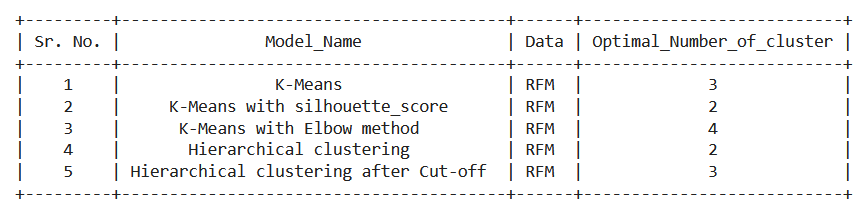

# **GitHub Link -**

https://github.com/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/ML_unsupervised_submission.ipynb

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from prettytable import PrettyTable 

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 4/Data/Online Retail.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

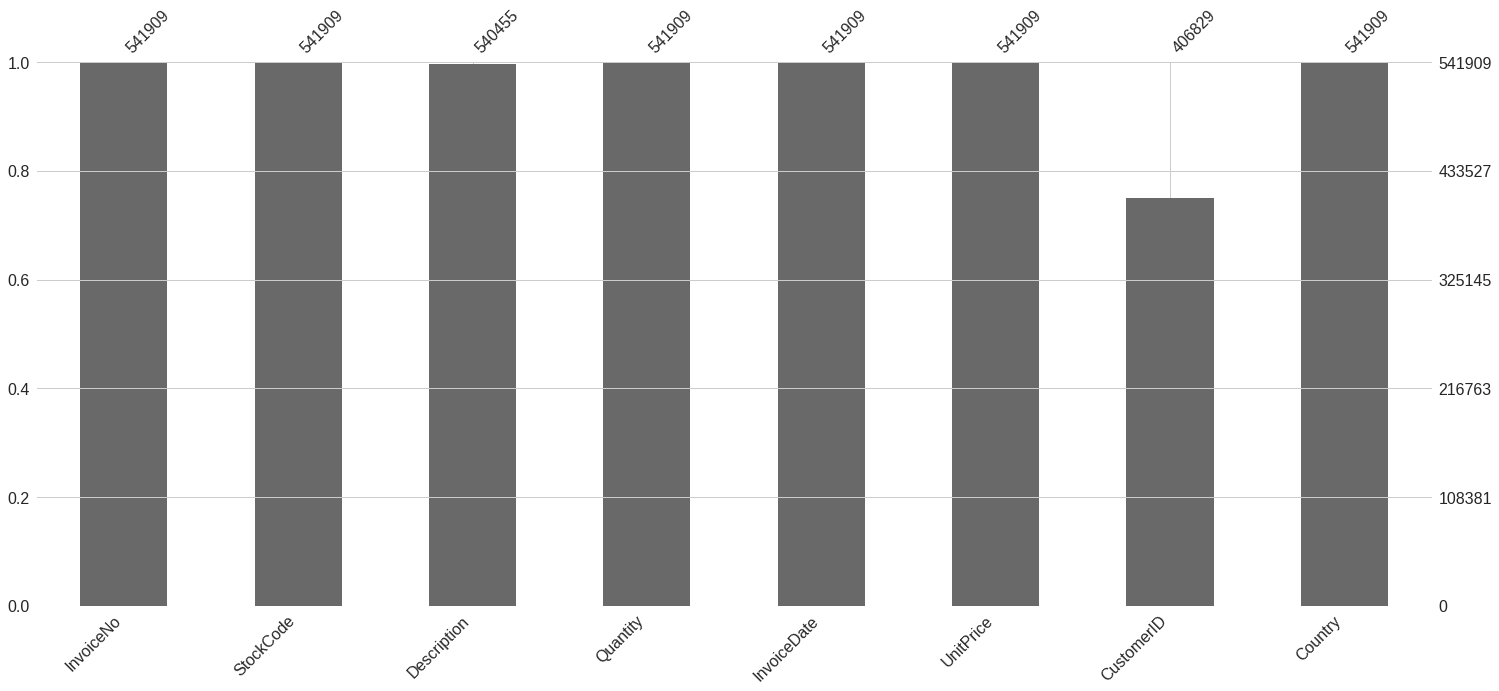

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

The data set contains information of different online customer, including invoice number, stock code, quantity, etc. (details in section below). 

Out dataframe have 5268 duplicates, and a number of NAN in 2 columns: discription and customer id(shown in graph above). 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description 

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

source: Internet.

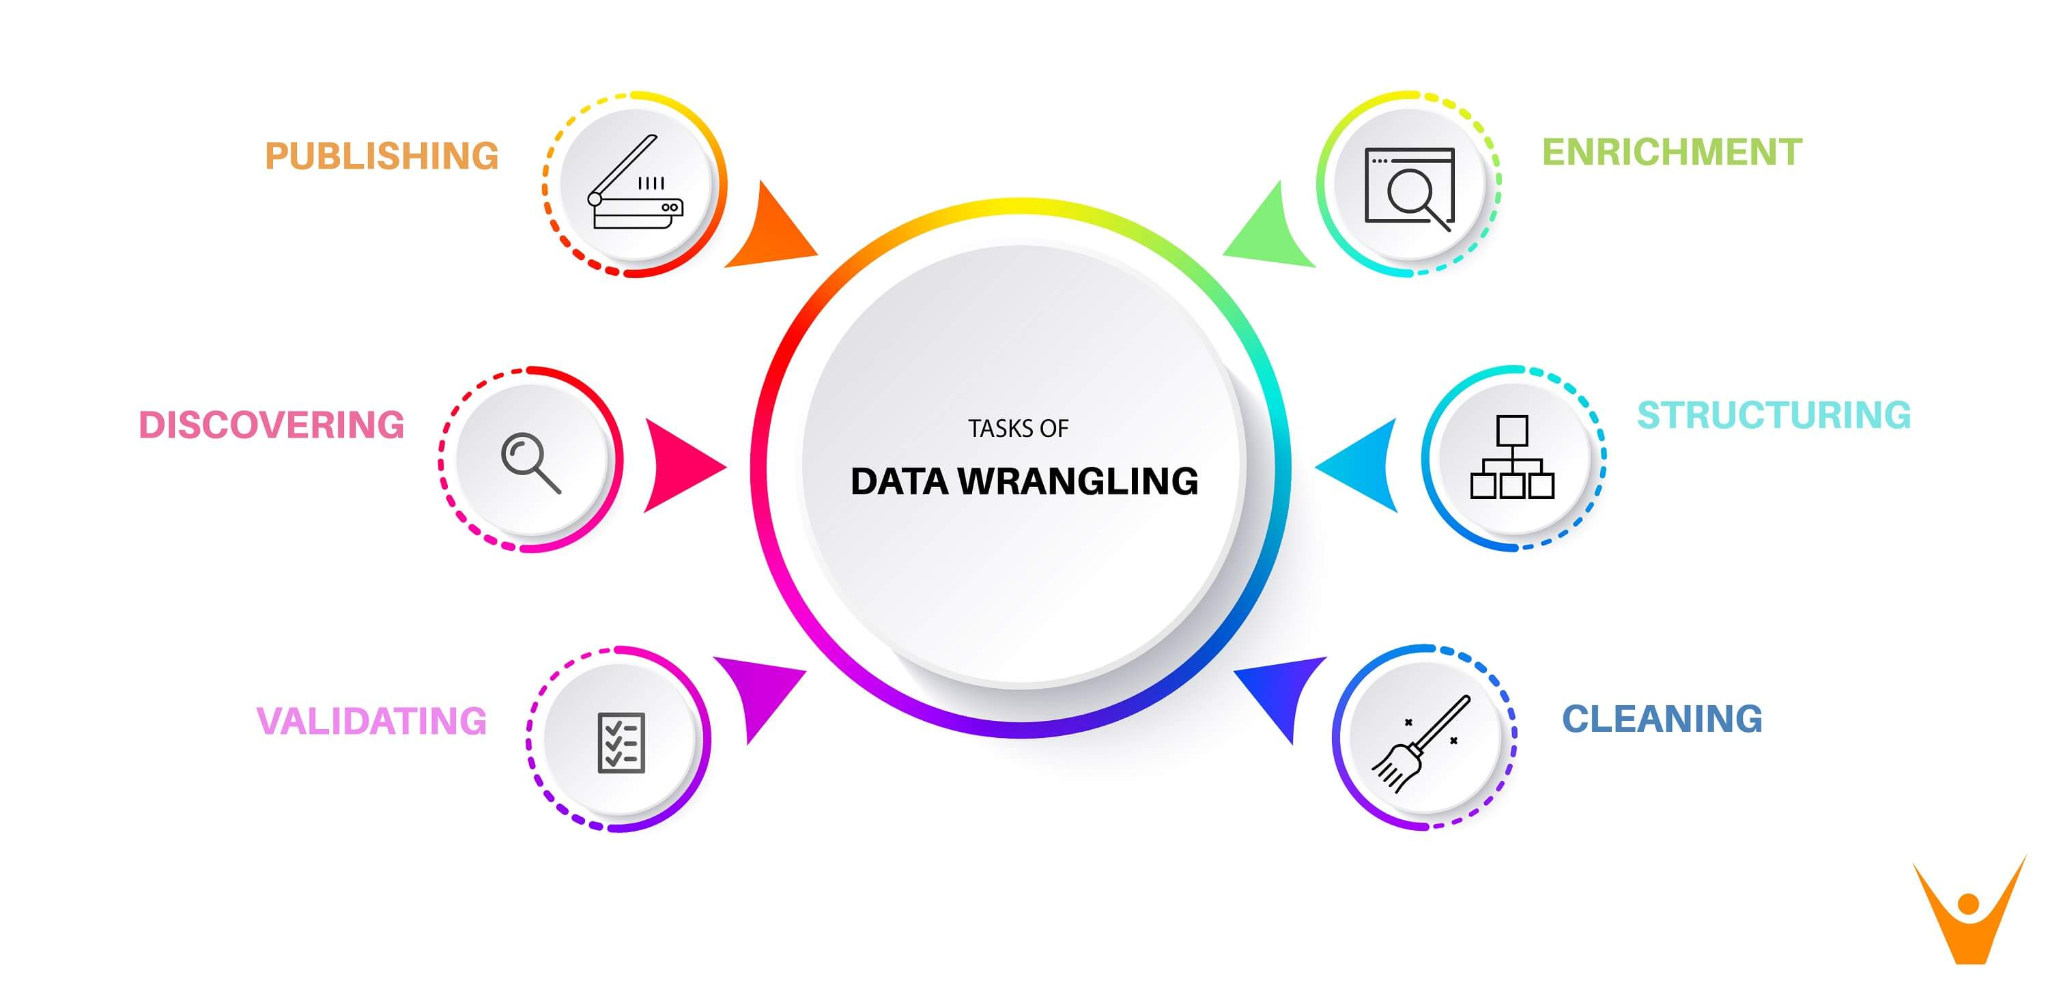

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
#We have a invoice date column, checking data type.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#We already have InvoiceDate as datetime object. I am stripping them into year, month, day, hours to have a better analysis of costomer. 
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B') 
df['Invoice_Day'] = df['InvoiceDate'].dt.strftime('%A') 
df['Invoice_Hour'] = df['InvoiceDate'].dt.hour

#Printing data frame
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

  Invoice_Month Invoice_Day  Invoice_Hour  
0      December   Wednesday             8  
1      December   Wednesday             8  
2      December   Wednesday             8  
3      December   Wednesday             8  
4      December   Wednesday             8

In [ ]:
#Adding a new column for total amount. Tital amount = Quantity*Unit price.
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#printing new data frame
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

  Invoice_Month Invoice_Day  Invoice_Hour  Total_Amount  
0      December   Wednesday             8         15.30  
1      December   Wednesday             8         20.34  
2      December   Wednesday             8         22.00  
3      December   Wednesday             8         20.34  
4      December   Wednesday             8         20.34

### What all manipulations have you done and insights you found?

I have done 2 manipulation in data frame:

1. Added 4 additional column from datetime feature, that are: Invoice year, Month, day and hour. 
2. I have also added one additional column for total amount spend by customer. 
Both this new column(feature) will help us better analyze the customer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

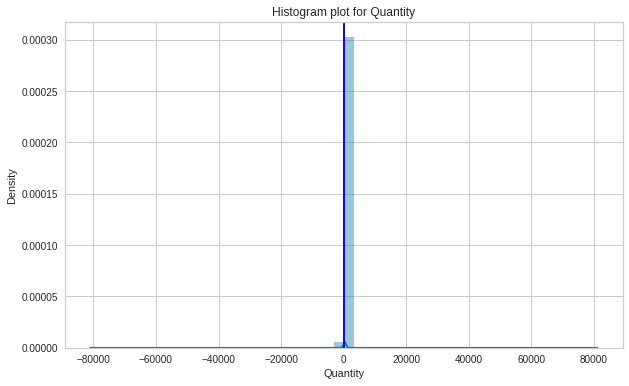

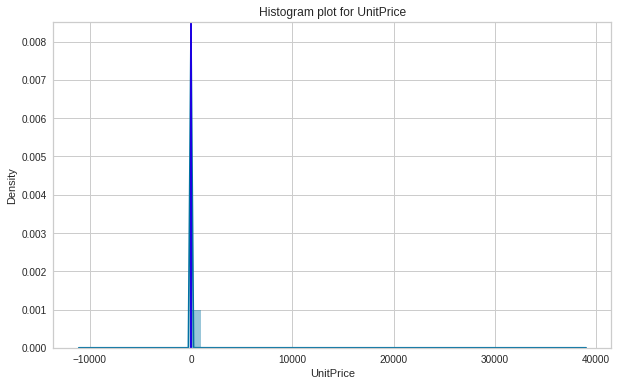

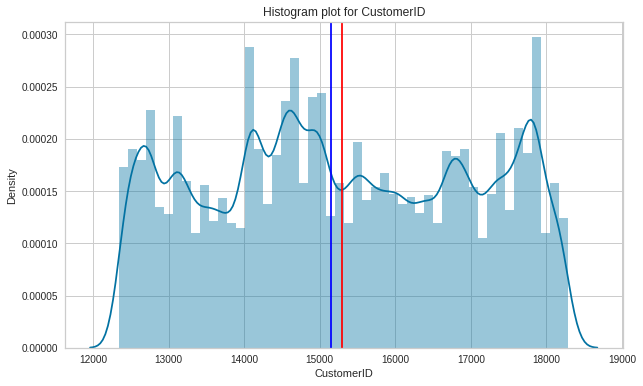

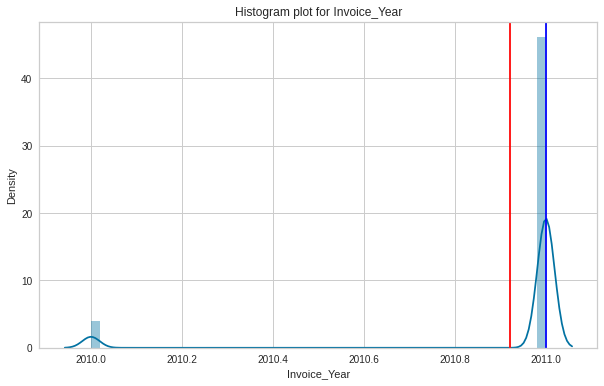

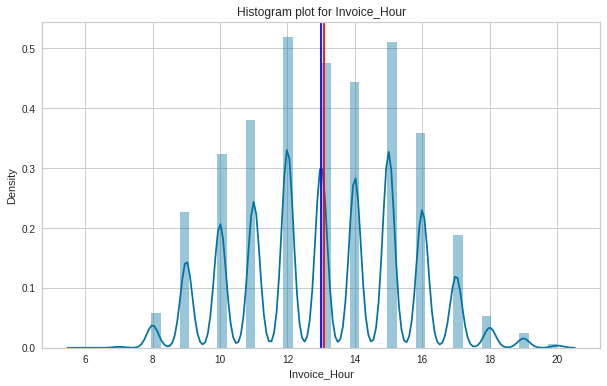

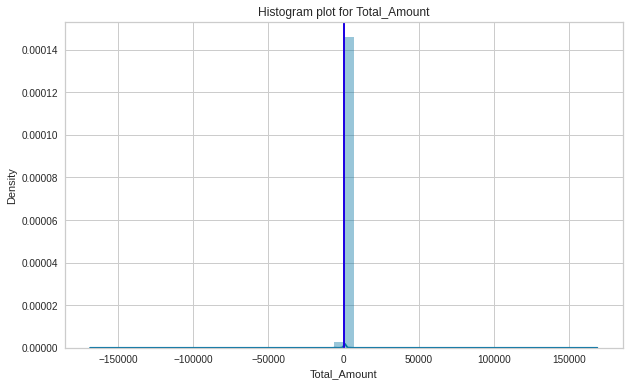

In [ ]:
num_features= list(df.select_dtypes(['int64','float64']))

for col in num_features:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  sns.distplot(df[col])
  feature = df[col]
  ax.axvline(feature.mean(), color= 'red')
  ax.axvline(feature.median(), color= 'Blue')
  ax.set_title(f'Histogram plot for {col}')

  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

In [ ]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

Country  Total Counts  Country %
0  United Kingdom        495478  91.431956
1         Germany          9495   1.752139
2          France          8557   1.579047
3            EIRE          8196   1.512431
4           Spain          2533   0.467422

Text(0.5, 1.0, 'Country vs counts of CX')

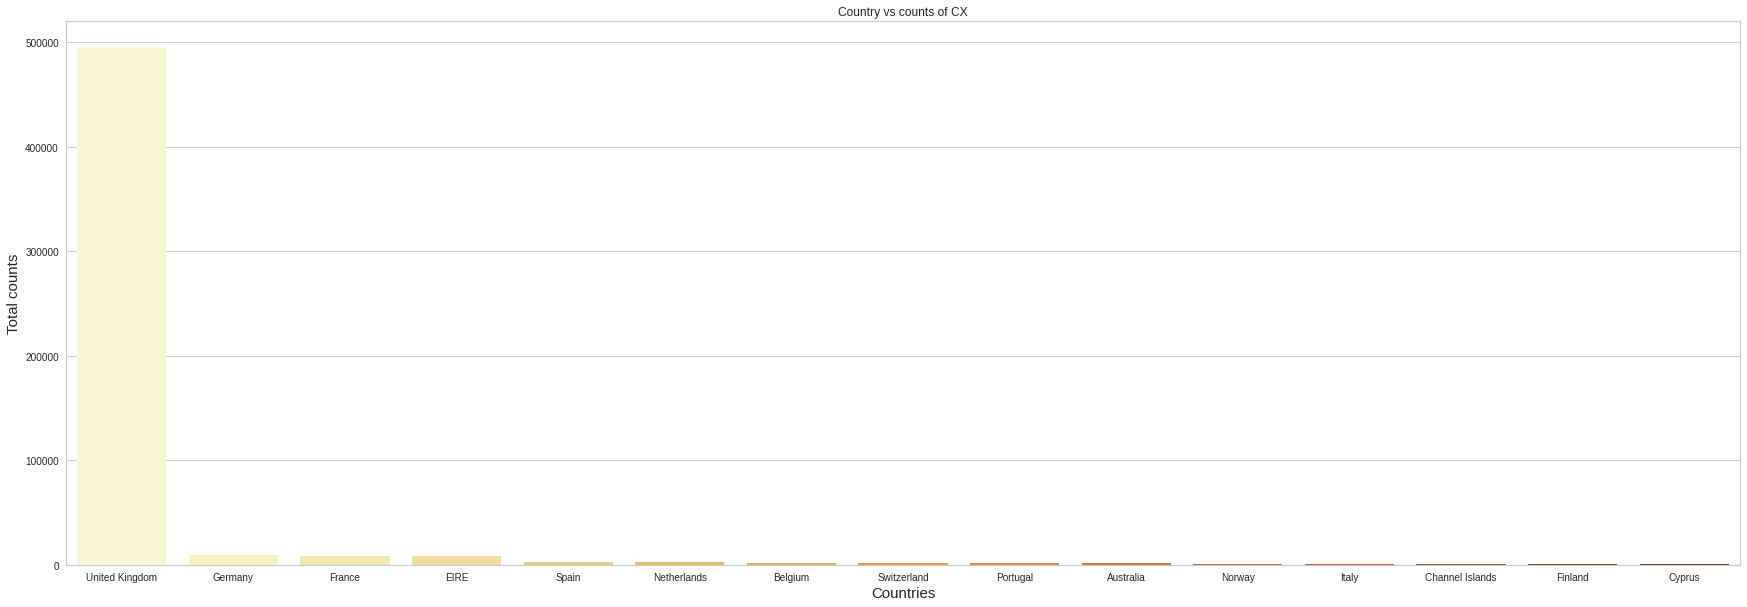

In [ ]:
plt.figure(figsize= (30,10))
sns.barplot(x = 'Country' , y = 'Total Counts' , data = top_countries[:15] , palette=("YlOrBr")) #Setting it will 15 only as there are may country with very small counts. 
plt.xlabel('Countries' , size = 15)
plt.ylabel('Total counts' , size  = 15)
plt.title('Country vs counts of CX')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

In [ ]:
top_months_df = pd.DataFrame(df['Invoice_Month'].value_counts().sort_values(ascending = False).reset_index())
top_months_df.rename(columns = {'index' : 'Invoice_Month' , 'Invoice_Month' : 'Monthly Frequency' } , inplace = True)

top_months_df

Invoice_Month  Monthly Frequency
0       November              84711
1       December              68006
2        October              60742
3      September              50226
4           July              39518
5            May              37030
6           June              36874
7          March              36748
8         August              35284
9        January              35147
10         April              29916
11      February              27707

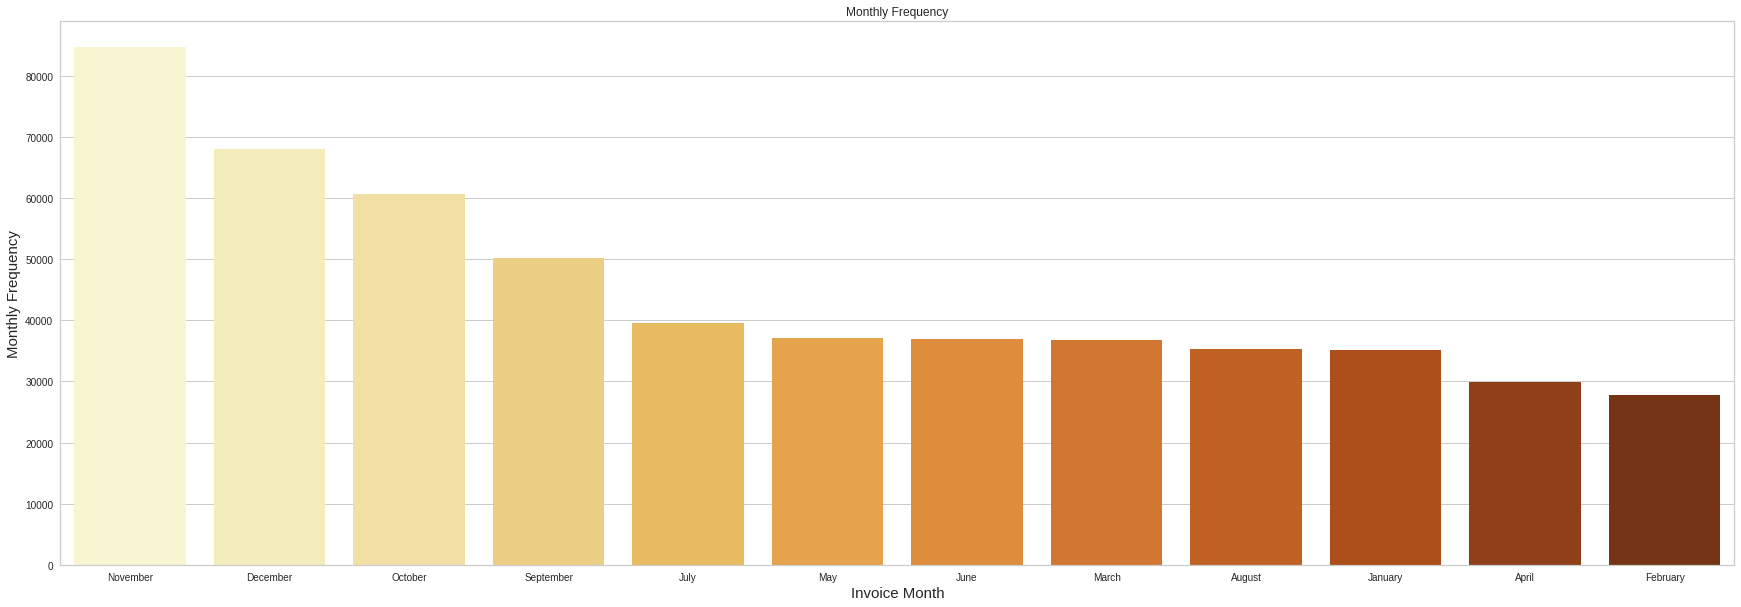

In [ ]:
plt.figure(figsize = (30,10))

sns.barplot(x = 'Invoice_Month' , y = 'Monthly Frequency' , data = top_months_df , palette=("YlOrBr"))
plt.xlabel('Invoice Month' , size = 15)
plt.ylabel('Monthly Frequency' , size = 15)
plt.title('Monthly Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

In [ ]:
top_days_df = pd.DataFrame( df['Invoice_Day'].value_counts().sort_values(ascending = False).reset_index())
top_days_df.rename(columns = {'index' : 'Invoice Day' , 'Invoice_Day' : 'Frequency'} , inplace = True)

top_days_df

Invoice Day  Frequency
0    Thursday     103857
1     Tuesday     101808
2      Monday      95111
3   Wednesday      94565
4      Friday      82193
5      Sunday      64375

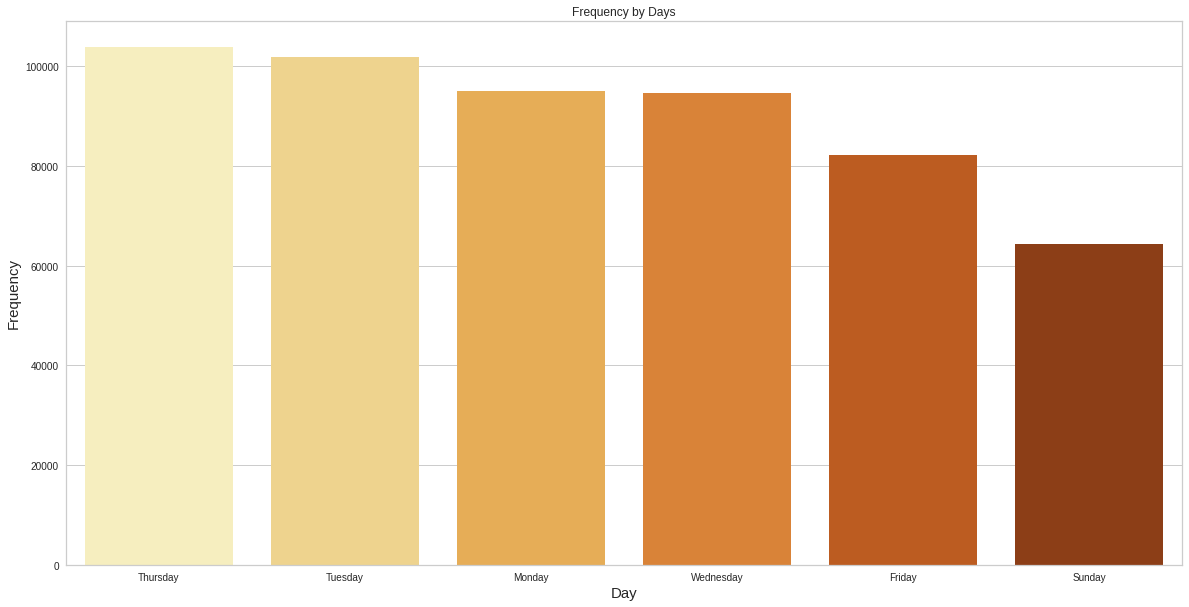

In [ ]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'Invoice Day' , y = 'Frequency' , data = top_days_df ,  palette=("YlOrBr"))
plt.xlabel('Day' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Days')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

In [ ]:
top_hrs_df = pd.DataFrame(df['Invoice_Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hrs_df.rename(columns = {'index' : 'Invoice Hour' , 'Invoice_Hour': 'Frequency'}, inplace = True)

top_hrs_df

Invoice Hour  Frequency
0             12      78709
1             15      77519
2             13      72259
3             14      67471
4             11      57674
5             16      54516
6             10      49037
7              9      34332
8             17      28509
9              8       8909
10            18       7974
11            19       3705
12            20        871
13             7        383
14             6         41

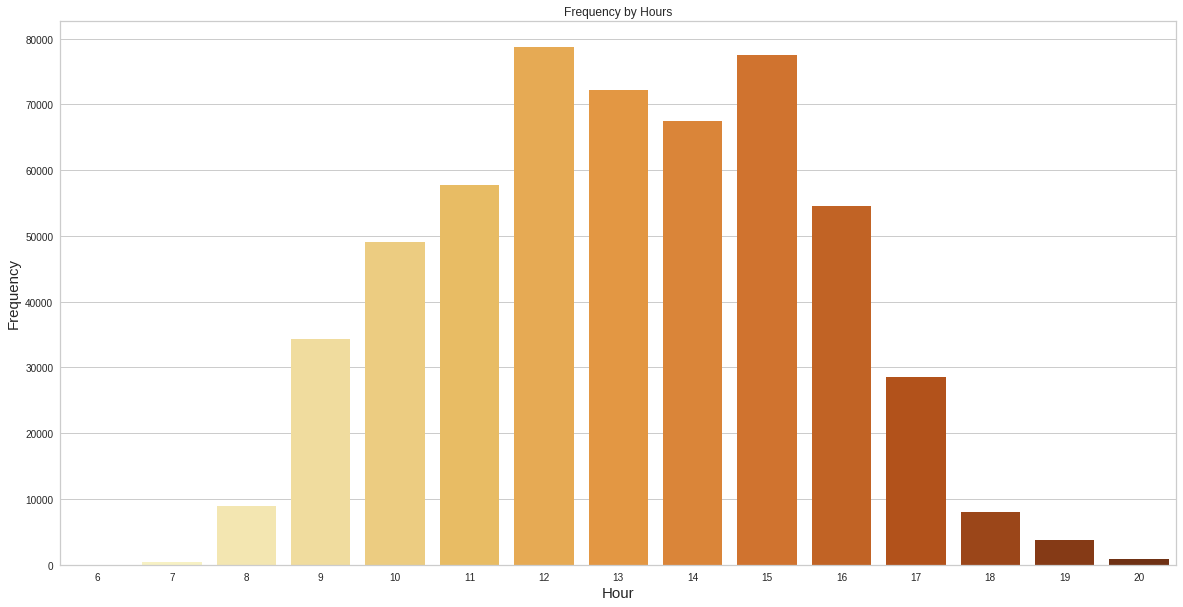

In [ ]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'Invoice Hour' , y = 'Frequency' , data = top_hrs_df ,  palette=("YlOrBr"))
plt.xlabel('Hour' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Hours')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

In [ ]:
product_desc_df = pd.DataFrame(df['Description'].value_counts().sort_values(ascending = False).reset_index())
product_desc_df.rename(columns = {'index' : 'Description' , 'Description': 'Frequency'}, inplace = True)

product_desc_df

Description  Frequency
0     WHITE HANGING HEART T-LIGHT HOLDER       2369
1               REGENCY CAKESTAND 3 TIER       2200
2                JUMBO BAG RED RETROSPOT       2159
3                          PARTY BUNTING       1727
4                LUNCH BAG RED RETROSPOT       1638
...                                  ...        ...
4218                        dotcom sales          1
4219   LIGHT DECORATION BATTERY OPERATED          1
4220     ASSORTED TUTTI FRUTTI ROUND BOX          1
4221         RUBY GLASS CLUSTER NECKLACE          1
4222      PINK BERTIE MOBILE PHONE CHARM          1

[4223 rows x 2 columns]

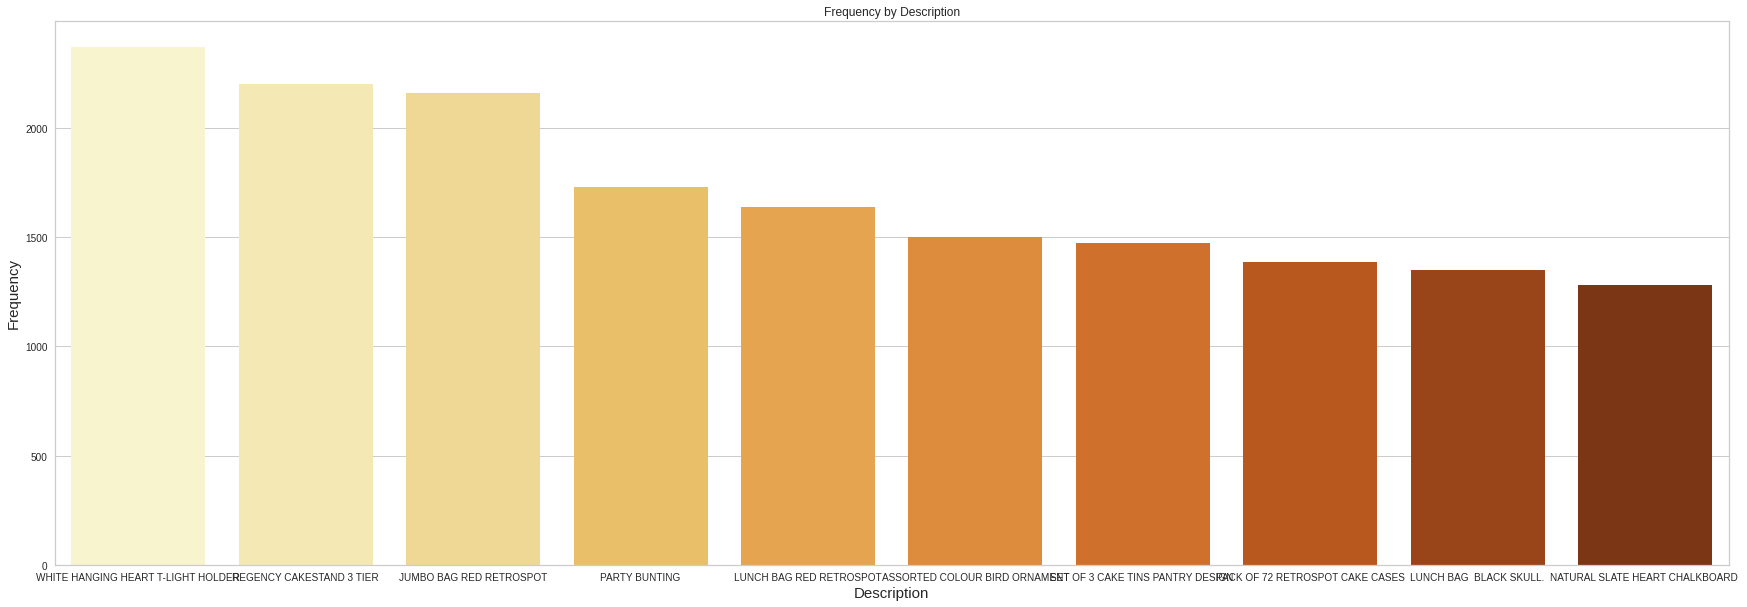

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(x = 'Description' , y = 'Frequency' , data = product_desc_df[:10] ,  palette=("YlOrBr"))
plt.xlabel('Description' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Description')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

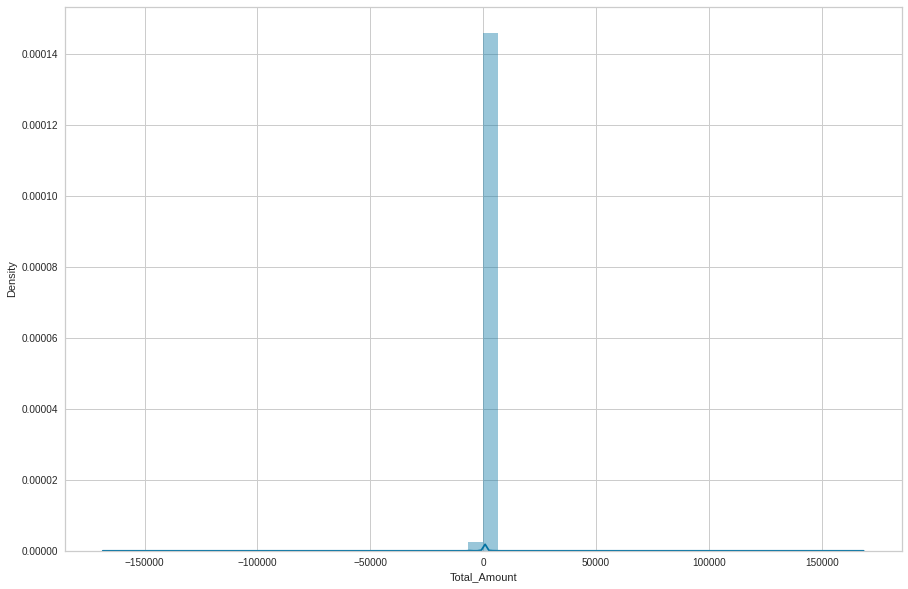

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df['Total_Amount'])

The graph is showing below 0 and -ve as well. Removing it. 

Text(0.5, 1.0, 'Distribution of Total Amount')

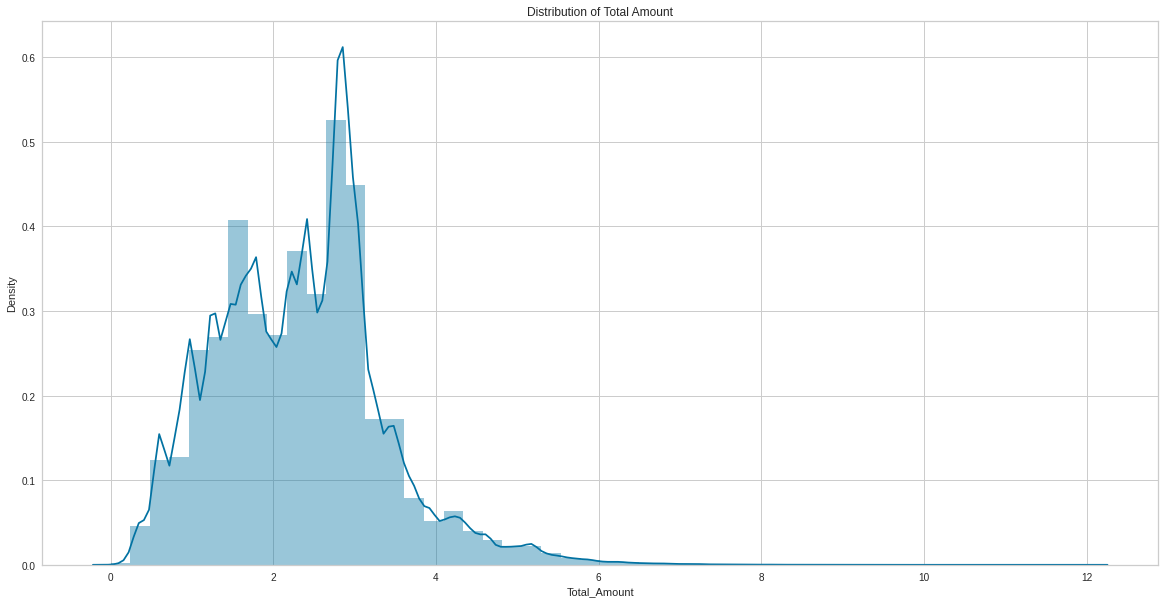

In [ ]:
total_amount_df = df[df['Total_Amount']>0]

# Distribution of Total amounts
plt.figure(figsize = (20,10))
sns.distplot(np.log1p(total_amount_df['Total_Amount']))
plt.title('Distribution of Total Amount')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

This is a right skewed distribution. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Reason for so many -ve total amount was because a number of customers are cancelling the order as well, which is bad for buisness. I am writing a function to check where total amount is negative, and visualizing them.

In [ ]:
#Making a function to check if total amount is negative(means cancelled, thus loss for company)


def cancel_or_not(data):
  '''
  This function will check if the total amount is in negative which imply that the order was cancelled.
  '''
  if (data<0):
    return 'cancelled'
  
  else:
    return 'Not cancelled'

  return data

In [ ]:
df_copy = df.copy() #making a copy as I do not want original data frame to change.
df_copy['Cancelling_insight'] = df['Total_Amount'].apply(cancel_or_not)
cancellation_df = pd.DataFrame(df_copy.groupby('Cancelling_insight' , sort= False).agg({'CustomerID': 'count'}))
cancellation_df

CustomerID
Cancelling_insight            
Not cancelled           397924
cancelled                 8905

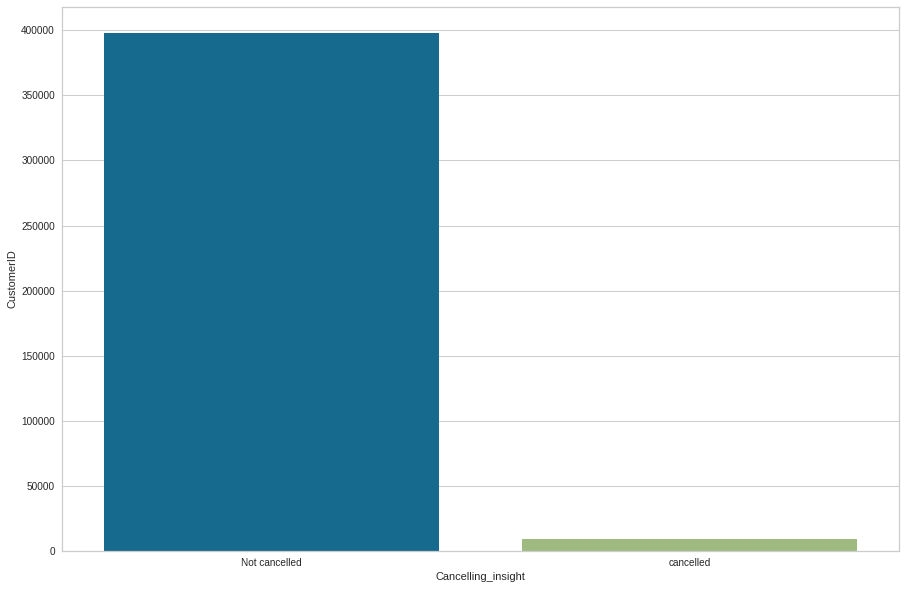

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (15,10))

sns.barplot(x = cancellation_df.index , y = 'CustomerID' ,data = cancellation_df )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Corelation Matrix')

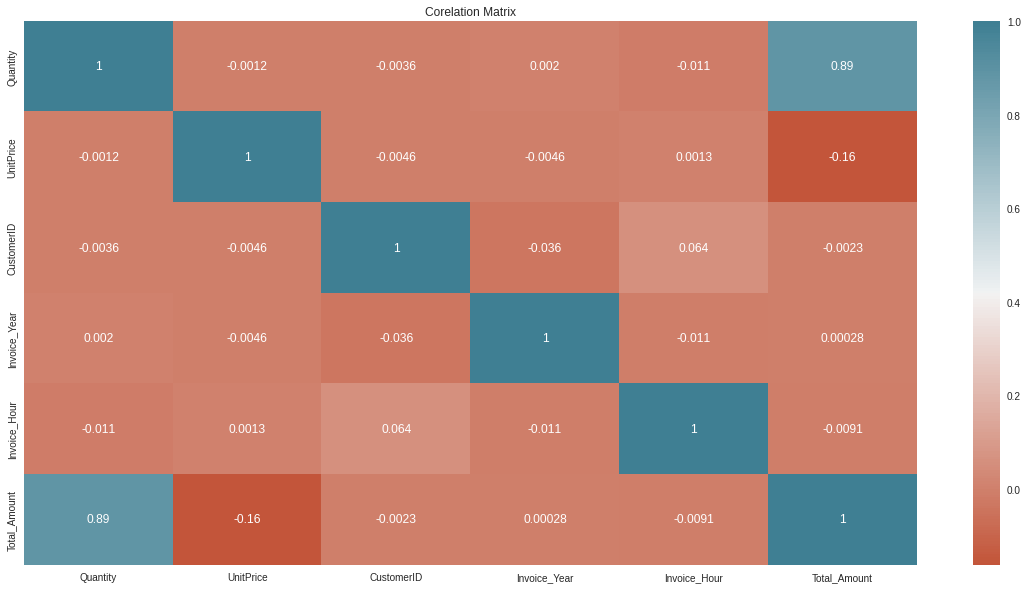

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (20,10))

sns.heatmap(df.corr() , annot = True , cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Corelation Matrix')

##### 1. Why did you pick the specific chart?

Heatmaps are best plot to read and understand corelation. 
The more close 2 columns are, the closer to 1 it gets. 
-ve means they are inversely corelated.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

# sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
Invoice_Year          0
Invoice_Month         0
Invoice_Day           0
Invoice_Hour          0
Total_Amount          0
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.dropna(axis = 0 , inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing data can not with replaced with mean, median or mode, thus deciding to drop the rows ith missing values. As less than 50% of value is missing from column, thus not droppingf the column instead dropping the row. 

(additing additional section:)

***RFM Model (Recency, Frequency, Monetary Value)***

---


---
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.

**Recency**: How recently cx purchased.

**Frequency**: How often a customer makes a purchase.

**Monetary Value**: How much money a customer spends on.

Performing RFM Segmentation and RFM Analysis, Step by Step

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).


---


In [ ]:
#Removing all cancelled invoices as it is not useful in customer segmentation.  
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# creating column for only date
df['Invoice_Date'] = df['InvoiceDate'].dt.date
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)
# Creating dataframe to record RFM score
RFM_df = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Amount': 'sum'}).reset_index()
# Renaming columns
RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Amount': 'MonetaryValue'}, inplace=True)

In [ ]:
RFM_df.head(10)

CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      326          1       77183.60
1     12347.0        2        182        4310.00
2     12348.0       75         31        1797.24
3     12349.0       19         73        1757.55
4     12350.0      310         17         334.40
5     12352.0       36         85        2506.04
6     12353.0      204          4          89.00
7     12354.0      232         58        1079.40
8     12355.0      214         13         459.40
9     12356.0       23         59        2811.43

**Plots**

Text(0.5, 1.0, 'Recency Distribution Plot')

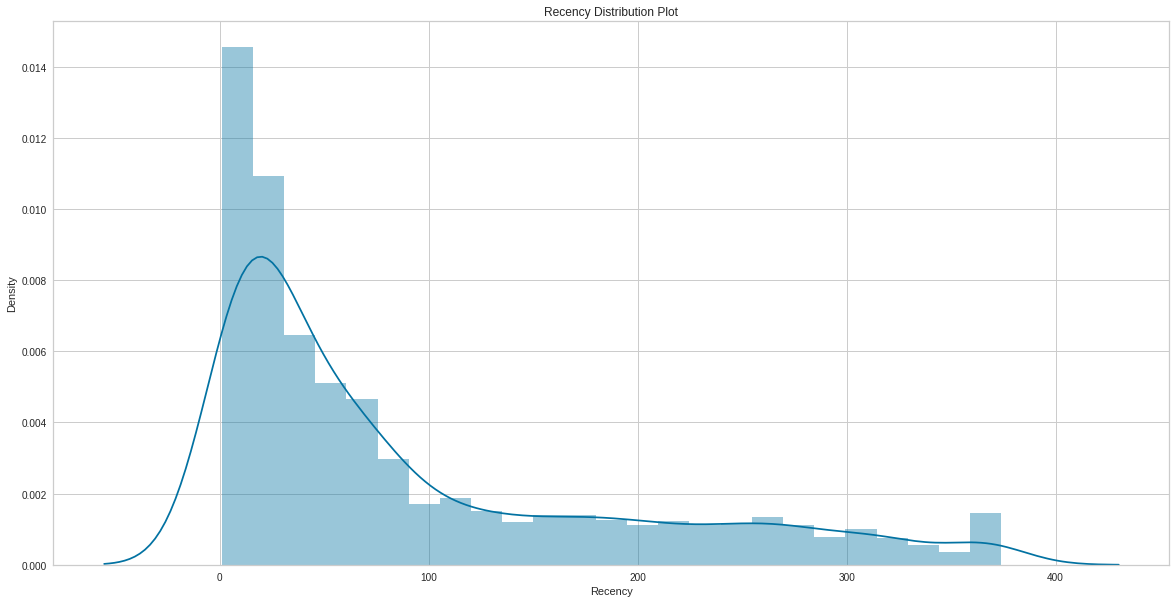

In [ ]:
plt.figure(figsize = (20 , 10))
sns.distplot(RFM_df.Recency)
plt.title('Recency Distribution Plot')

Text(0.5, 1.0, 'Frequency Distribution Plot')

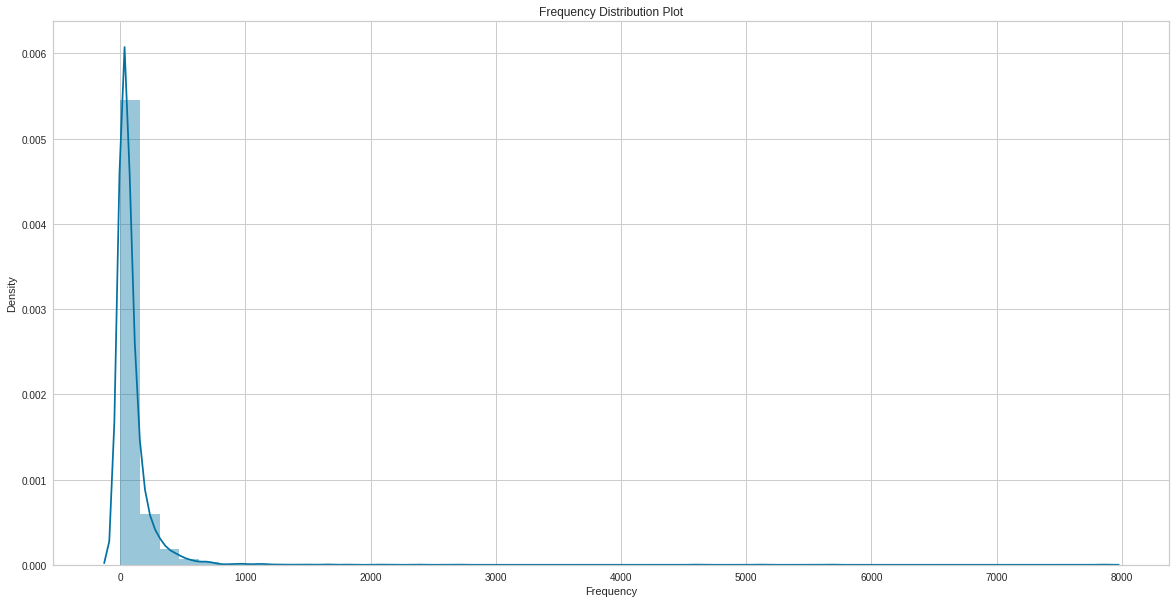

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(RFM_df.Frequency)
plt.title('Frequency Distribution Plot')

Text(0.5, 1.0, 'Monetary Distribution Plot')

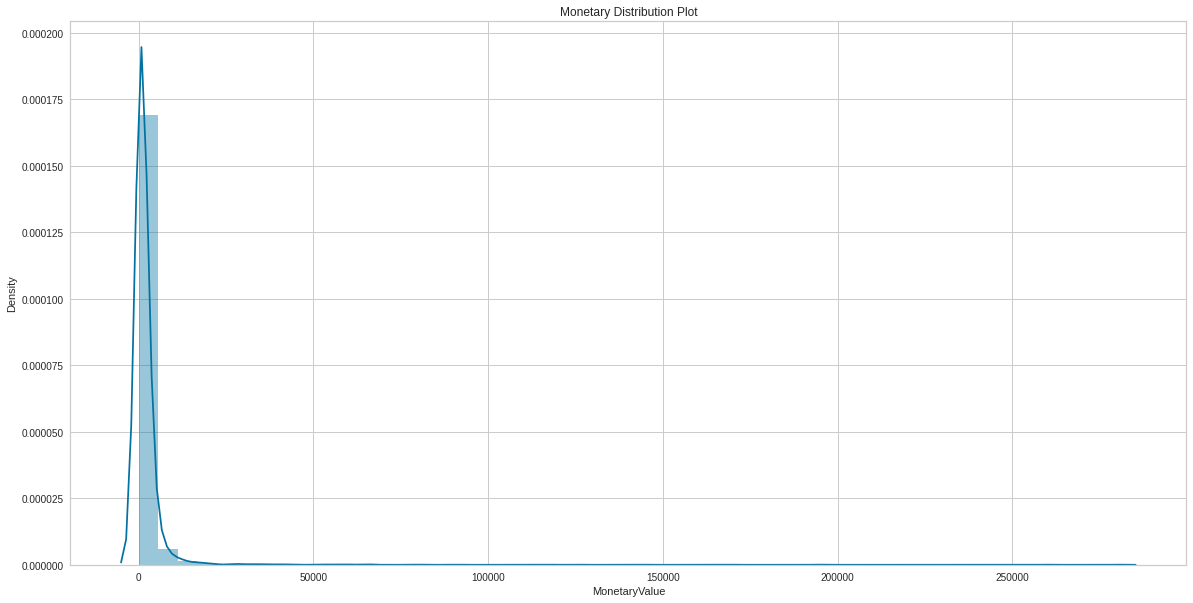

In [ ]:
plt.figure(figsize = (20 , 10))
sns.distplot(RFM_df.MonetaryValue)
plt.title('Monetary Distribution Plot')

Checking of there is some corelation in this dataframe. 

Text(0.5, 1.0, 'Correlation among RFM')

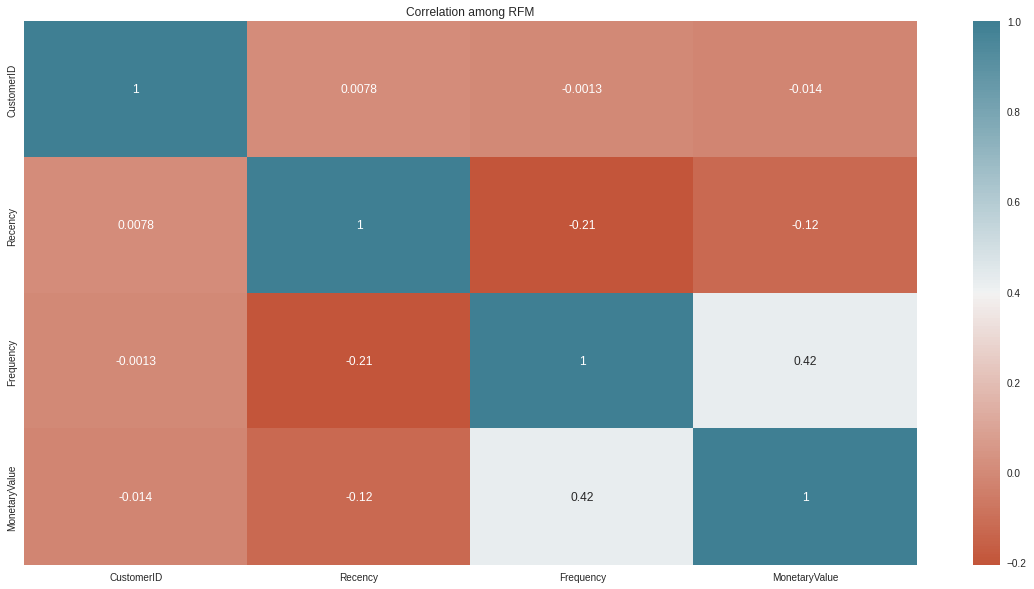

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(RFM_df.corr(), annot = True , cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Correlation among RFM')

In [ ]:
#Splitting into 25, 50, 75 : 4 quantiles.
quantiles = RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'MonetaryValue': {0.25: 307.245, 0.5: 674.45, 0.75: 1661.64}}

In [ ]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_df['R'] = RFM_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_df['F'] = RFM_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_df['M'] = RFM_df['MonetaryValue'].apply(FnMScoring, args=('MonetaryValue',quantiles,))
RFM_df.head()

CustomerID  Recency  Frequency  MonetaryValue  R  F  M
0     12346.0      326          1       77183.60  4  4  1
1     12347.0        2        182        4310.00  1  1  1
2     12348.0       75         31        1797.24  3  3  1
3     12349.0       19         73        1757.55  2  2  1
4     12350.0      310         17         334.40  4  4  3

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].sum(axis = 1)
RFM_df.head()

CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore
0     12346.0      326          1       77183.60  4  4  1         9
1     12347.0        2        182        4310.00  1  1  1         3
2     12348.0       75         31        1797.24  3  3  1         7
3     12349.0       19         73        1757.55  2  2  1         5
4     12350.0      310         17         334.40  4  4  3        11

In [ ]:
#Making a new column for RFM group
RFM_df['RFMGroup'] = RFM_df.R.map(str) + RFM_df.F.map(str) + RFM_df.M.map(str)
RFM_df.head()

CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore RFMGroup
0     12346.0      326          1       77183.60  4  4  1         9      441
1     12347.0        2        182        4310.00  1  1  1         3      111
2     12348.0       75         31        1797.24  3  3  1         7      331
3     12349.0       19         73        1757.55  2  2  1         5      221
4     12350.0      310         17         334.40  4  4  3        11      443

**Interpretation**

RFMScore: It is the sum of R, F and M value that assigned by quantiles.

RFMGroup: This is the combination of R,F, and M values.

For example:

A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

**Using IQR.**

In [ ]:
rfm = ['Recency','Frequency','MonetaryValue']
for col in rfm:
  Q1 = RFM_df[col].quantile(0.05)
  Q3 = RFM_df[col].quantile(0.95)
  IQR = Q3 - Q1
  RFM_df = RFM_df [(RFM_df[col] >= Q1 - 1.5*IQR) & (RFM_df[col] <= Q3 + 1.5*IQR)]

In [ ]:
#Updated RFM. 
RFM_df.head()

CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore RFMGroup
1     12347.0        2        182        4310.00  1  1  1         3      111
2     12348.0       75         31        1797.24  3  3  1         7      331
3     12349.0       19         73        1757.55  2  2  1         5      221
4     12350.0      310         17         334.40  4  4  3        11      443
5     12352.0       36         85        2506.04  2  2  1         5      221

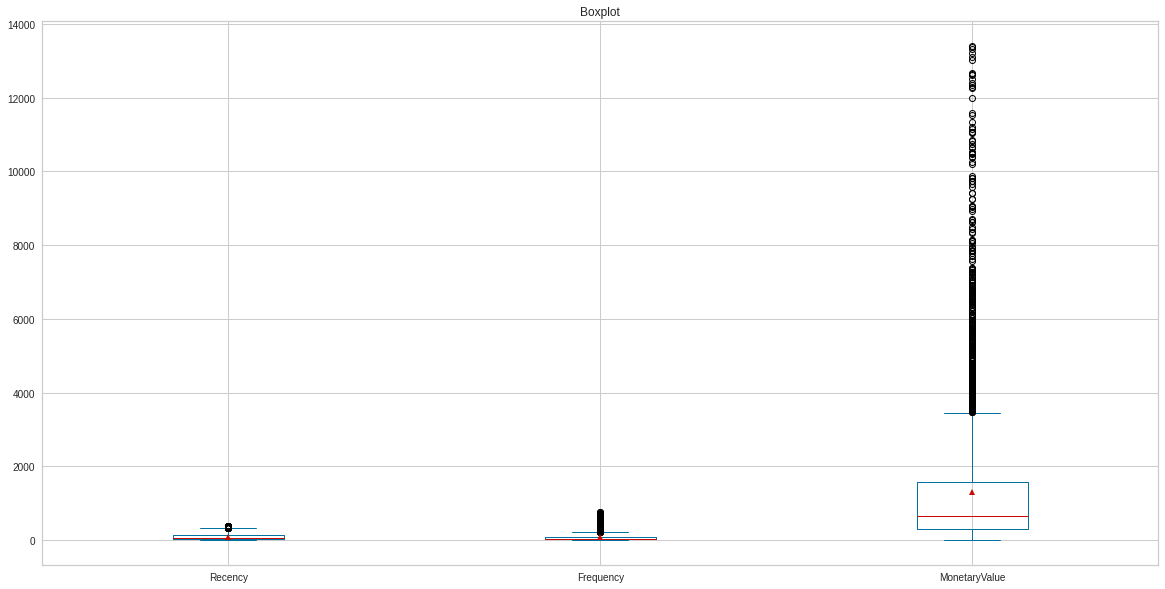

In [ ]:
#Box plot:

plt.rcParams['figure.figsize']=(20,10)
ax = RFM_df[["Recency","Frequency","MonetaryValue"]].plot(kind='box', title='Boxplot', showmeans=True)
plt.show()

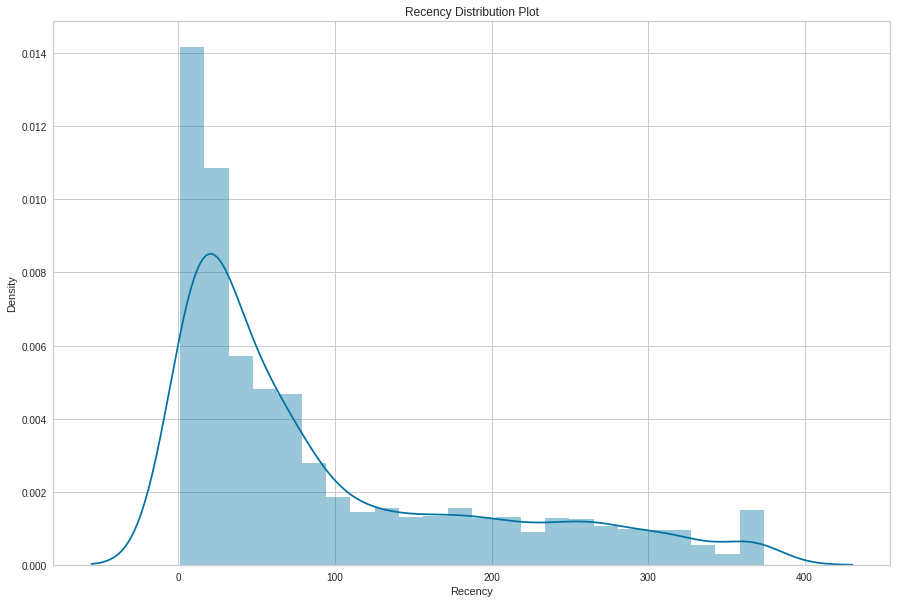

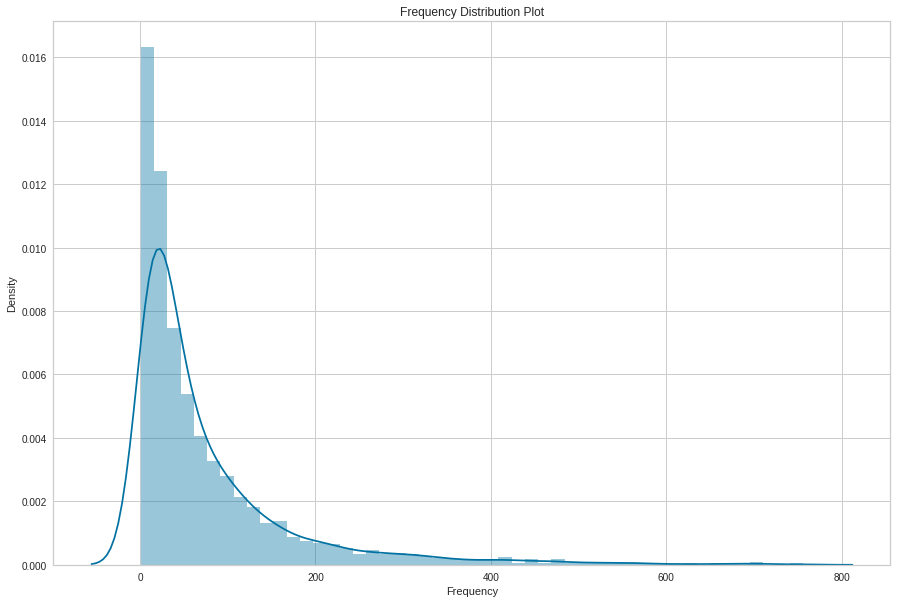

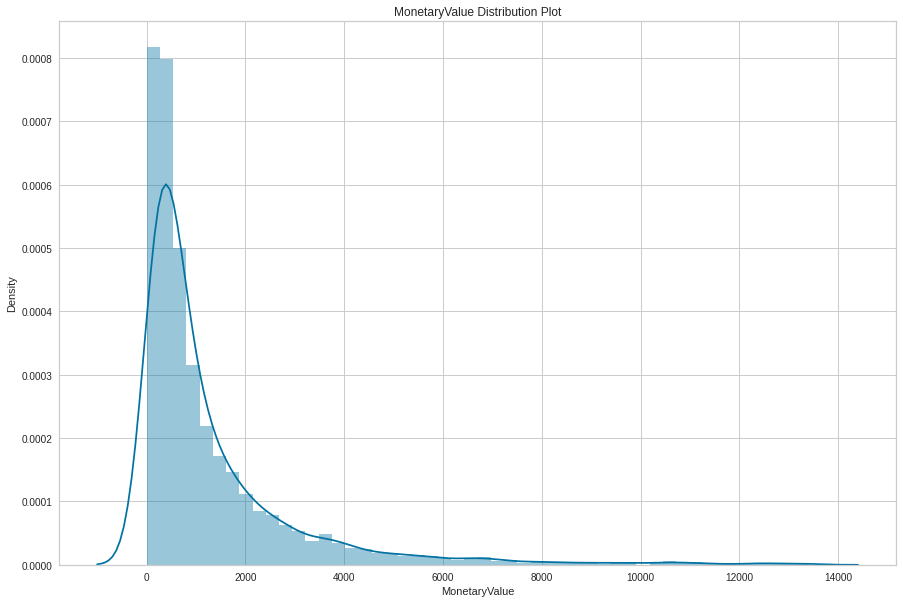

In [ ]:
#Checking RFM distribution:

for col in rfm:
  plt.figure(figsize = (15,10))
  sns.distplot(RFM_df[col])
  plt.title(f'{col} Distribution Plot')

All above distribution in RFM df are right skewed. 

Making a df to see the cx with higher RFM scores.

In [ ]:
# Top customers who frequent in all features
print(RFM_df[RFM_df['RFMScore'] == 3].sort_values('RFMScore', ascending = False).reset_index().head(10))
RFM_df[RFM_df['RFMScore'] == 3].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0      1     12347.0        2        182        4310.00  1  1  1         3   
1     15     12362.0        3        266        5226.23  1  1  1         3   
2   2981     16407.0       13        172        2126.93  1  1  1         3   
3   2975     16401.0        1        186        4098.32  1  1  1         3   
4   2969     16393.0        2        330        3046.21  1  1  1         3   
5   2960     16379.0        4        108        2157.40  1  1  1         3   
6   2944     16360.0        5        662        3512.53  1  1  1         3   
7   2942     16358.0        1        109        2027.50  1  1  1         3   
8   2919     16327.0       14        319        3844.22  1  1  1         3   
9   2918     16326.0        6        319        3110.96  1  1  1         3   

  RFMGroup  
0      111  
1      111  
2      111  
3      111  
4      111  
5      111  
6      111  
7      111  
8      111  
9      111 

(384, 9)

In [ ]:
print(RFM_df[(RFM_df['RFMScore'] > 3) & (RFM_df['RFMScore'] <= 5)].sort_values('RFMGroup', ascending = False).reset_index().head(10))
RFM_df[(RFM_df['RFMScore'] > 3) &(RFM_df['RFMScore'] <= 5)].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0   2115     15228.0       66        125        3386.71  3  1  1         5   
1   2448     15674.0       73        114        2446.60  3  1  1         5   
2   1610     14535.0       60        330        2864.19  3  1  1         5   
3    441     12916.0      139        107        3006.15  3  1  1         5   
4   1634     14565.0       96        127        3099.12  3  1  1         5   
5   1683     14639.0       52        172        2984.49  3  1  1         5   
6   1827     14841.0       53        138        3295.76  3  1  1         5   
7   1829     14844.0       64        130        3189.81  3  1  1         5   
8    393     12843.0       66        103        1702.26  3  1  1         5   
9   1834     14852.0       58        143        2836.69  3  1  1         5   

  RFMGroup  
0      311  
1      311  
2      311  
3      311  
4      311  
5      311  
6      311  
7      311  
8      311  
9      311 

(802, 9)

370 and 797 cx are two group of cx who are good for buisness acc to RFM df. 

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
Log_rfm_Data = RFM_df[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log1p, axis = 1)

In [ ]:
rfm_features = ['Recency', 'Frequency', 'MonetaryValue']
final_rfm = Log_rfm_Data[rfm_features].values
sc = StandardScaler()
X = sc.fit_transform(final_rfm)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - 1

**IMPLEMENTING K-MEANS**

---



In [ ]:
# ML Model - 1 Implementation
model = KMeans(n_clusters=3,max_iter=1000, random_state=10)
# Fit the Algorithm
cluster_labels = model.fit_predict(X)
print(cluster_labels)

[2 1 2 ... 0 2 1]


Text(0.5, 1.0, 'K-Means clustering with 3 clusters.')

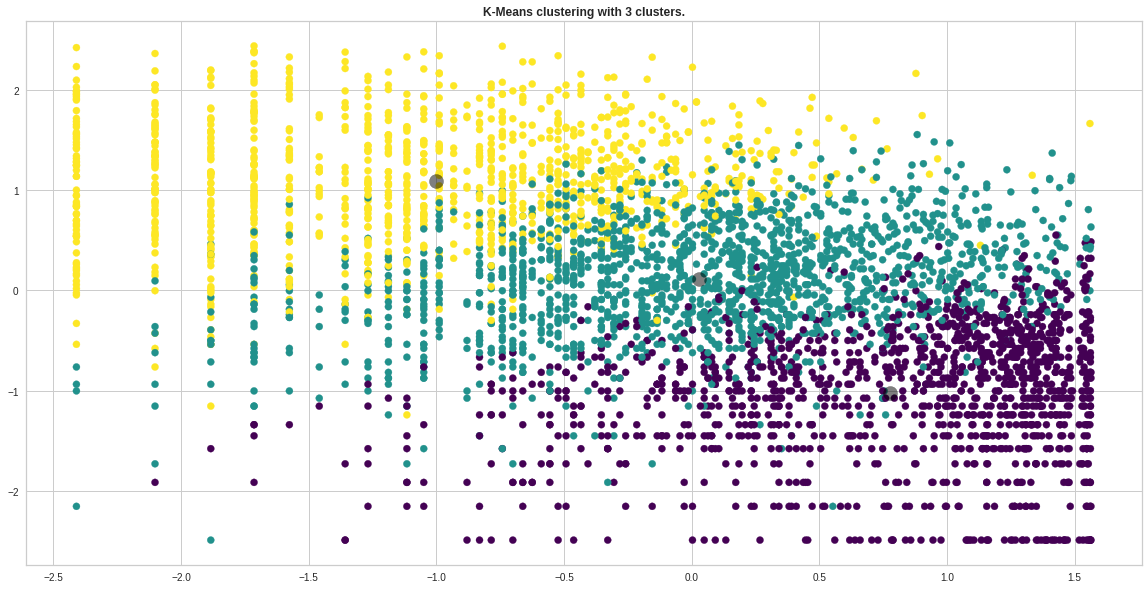

In [ ]:
#Plot 

plt.figure(figsize = (20,10))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50 , cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means clustering with 3 clusters.',fontweight = 'bold')

In [ ]:
model.cluster_centers_

array([[ 0.77616338, -1.01852553, -0.97578844],
       [ 0.02840204,  0.11143614,  0.05427312],
       [-1.00093609,  1.09114147,  1.1238352 ]])

In [ ]:
#Assigning labels

RFM_df['Cluster_Id'] =cluster_labels[0:4256]
print(RFM_df.head(6))

   CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore RFMGroup  \
1     12347.0        2        182        4310.00  1  1  1         3      111   
2     12348.0       75         31        1797.24  3  3  1         7      331   
3     12349.0       19         73        1757.55  2  2  1         5      221   
4     12350.0      310         17         334.40  4  4  3        11      443   
5     12352.0       36         85        2506.04  2  2  1         5      221   
6     12353.0      204          4          89.00  4  4  4        12      444   

   Cluster_Id  
1           2  
2           1  
3           2  
4           0  
5           2  
6           0  


In [ ]:
#Group by Cluster ID. 

RFM_df.groupby('Cluster_Id').mean()

CustomerID     Recency   Frequency  MonetaryValue         R  \
Cluster_Id                                                                  
0           15392.568488  177.464869   14.195174     277.525253  3.388219   
1           15302.881176   74.654118   54.441176     897.878566  2.495882   
2           15198.358326   20.083697  186.490846    3195.598614  1.451613   

                   F         M   RFMScore  
Cluster_Id                                 
0           3.674237  3.621008  10.683463  
1           2.411176  2.454118   7.361176  
2           1.316478  1.299913   4.068003

In [ ]:
#Number of cx in each clusters:

RFM_df['Cluster_Id'].value_counts()

1    1700
0    1409
2    1147
Name: Cluster_Id, dtype: int64

**Cluster details**:

---


    
**Cluster 0**: The group of customers of whom Recency is very low, frequencies are very less and Company is generating only few bucks.

**Cluster 1**: This cluster give the insights that these are marked with less frequency but more frequent than cluster 0 and company is making more money than cluster 0.

**Cluster 2**: These are one who visits more, they are more frequent and they are helping to generate a lot of business.

---



**Observation**:

Cluster 1 have the most cx, followed by cluster 0 and cluster 2. The company needs to push more and more cx from cluster 1 and 0 towards 2 and work on keeping cluster 1 more happy. 


### ML Model - 2

**Implementing K-means clustering with Silhouette**

---



In [ ]:
#Setting range:

cluster_range = [2,3,4,5,7,8,10]

For n_clusters = 2, The average silhouette_score is :0.3980102073446338.
For n_clusters = 3, The average silhouette_score is :0.2962529539347942.
For n_clusters = 4, The average silhouette_score is :0.3048474761096056.
For n_clusters = 5, The average silhouette_score is :0.2795932252612818.
For n_clusters = 7, The average silhouette_score is :0.26627686634329506.
For n_clusters = 8, The average silhouette_score is :0.2588175073904285.
For n_clusters = 10, The average silhouette_score is :0.2720877780065119.


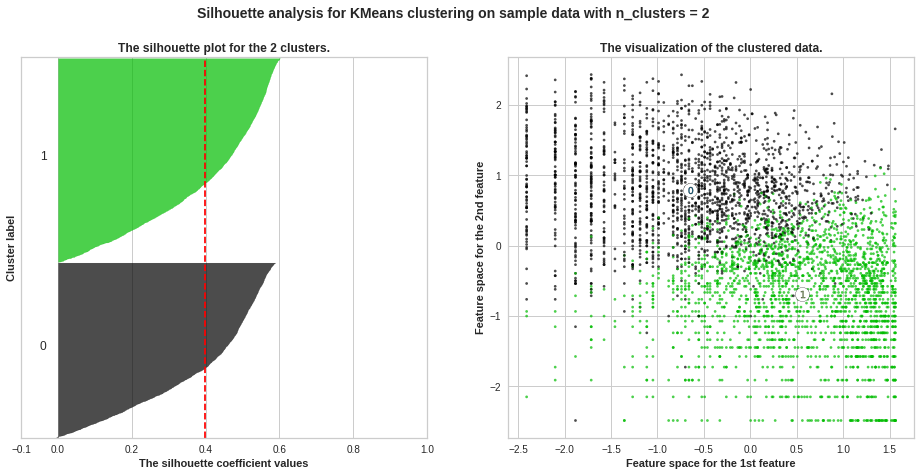

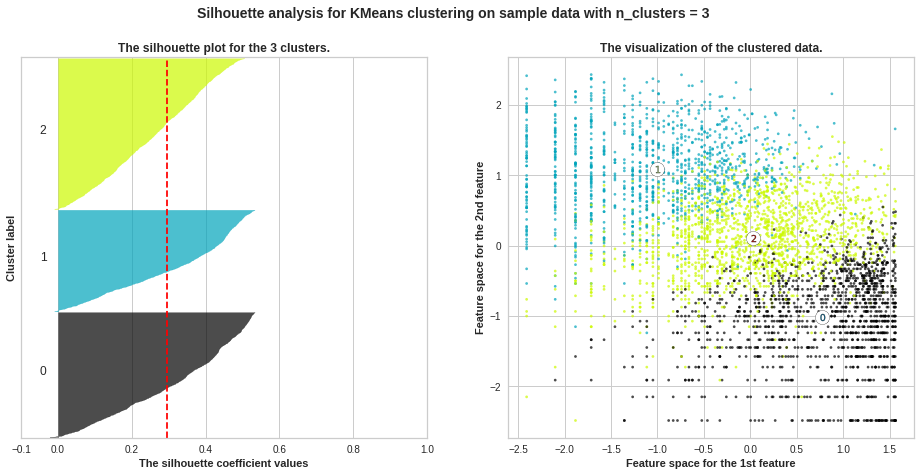

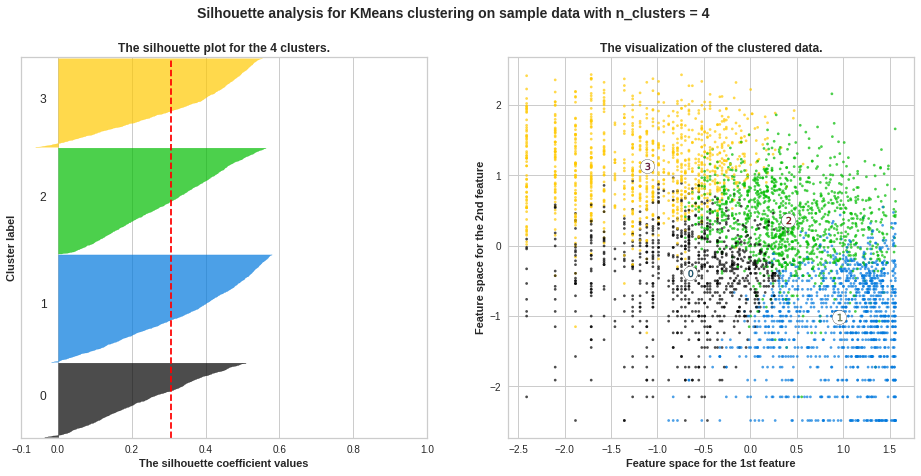

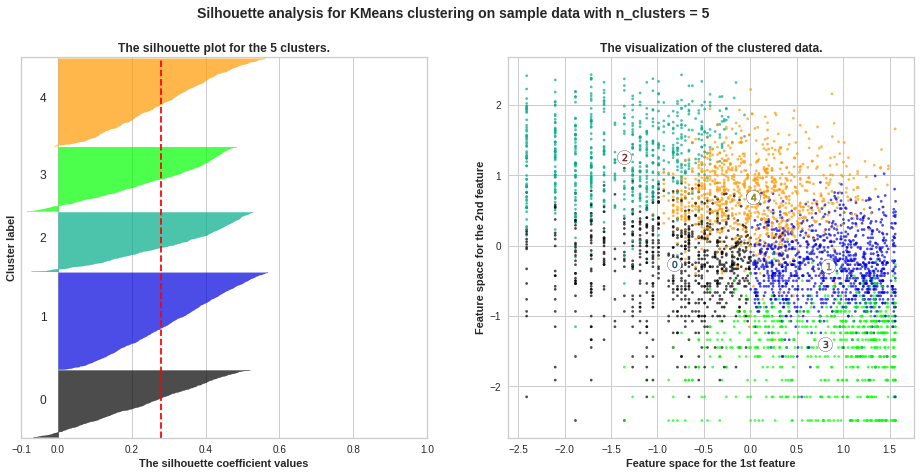

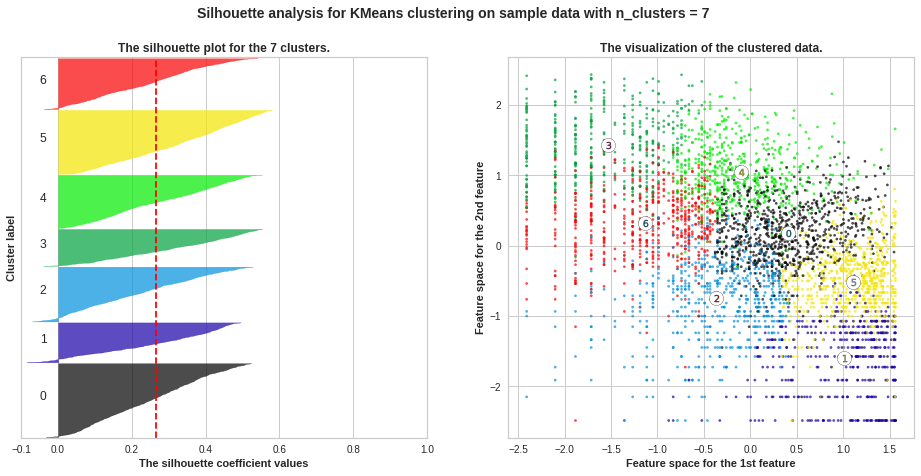

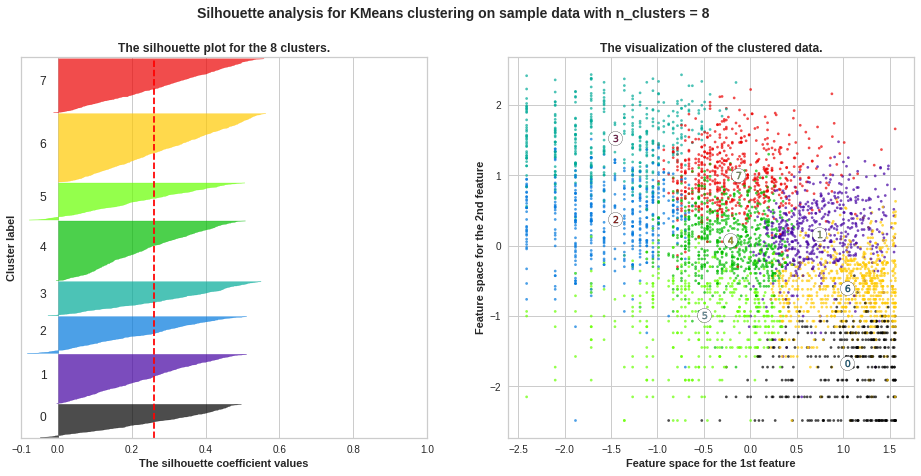

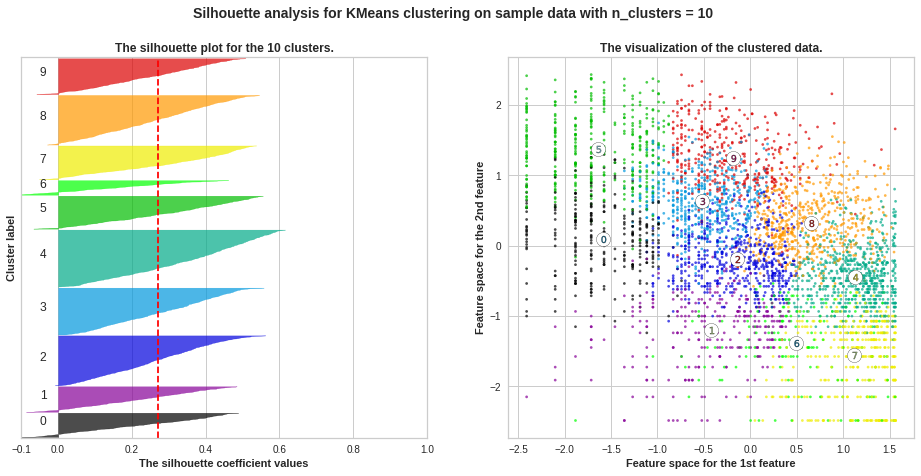

In [ ]:
for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state= 1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is :{silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for the {n_clusters} clusters.",fontweight = 'bold')
    ax1.set_xlabel("The silhouette coefficient values",fontweight = 'bold')
    ax1.set_ylabel("Cluster label", fontweight = 'bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Cluster label
    centers = clusterer.cluster_centers_
    # Drawing white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.",fontweight = 'bold')
    ax2.set_xlabel("Feature space for the 1st feature",fontweight = 'bold')
    ax2.set_ylabel("Feature space for the 2nd feature",fontweight = 'bold')

    plt.suptitle((f'Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}'),
                 fontsize=14, fontweight='bold')

plt.show()

Wit n = 2 , silhoutte score is 0.39. There are less change of assigning cx in wrong clusters here as clusters are far away. 

### ML Model - 3

**Implementing K-means with Elbow Method**

---



In [ ]:
model3 = KMeans()

In [ ]:
#Finding best nu,ber of clusters
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''
  
  metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  
  for m in metrics:
    visualizer = KElbowVisualizer(model3, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

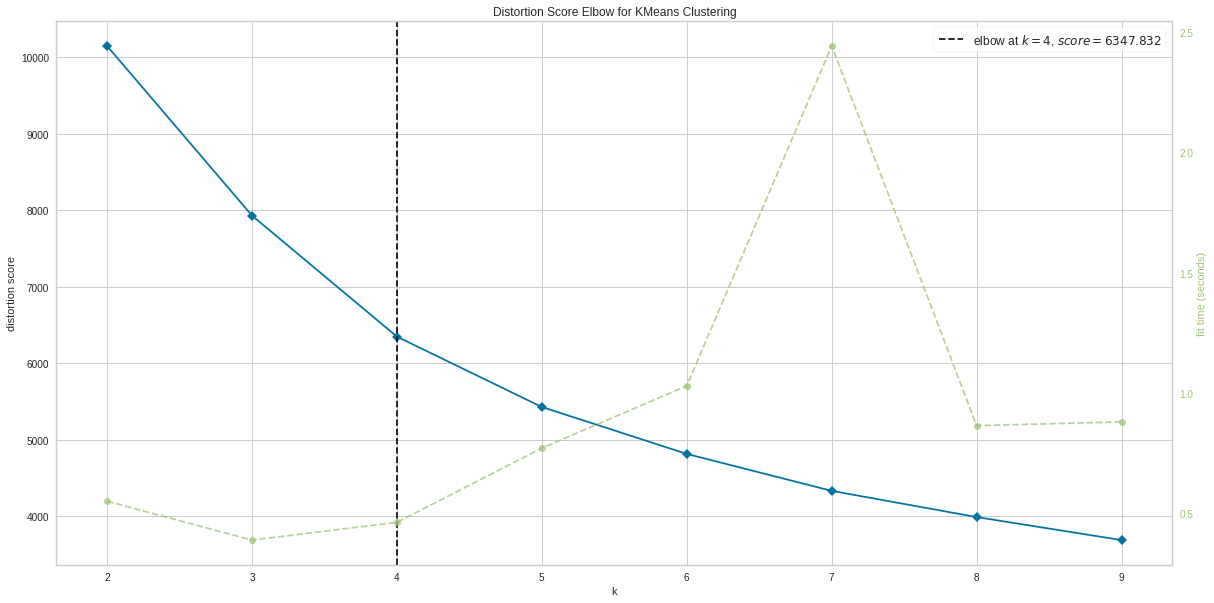

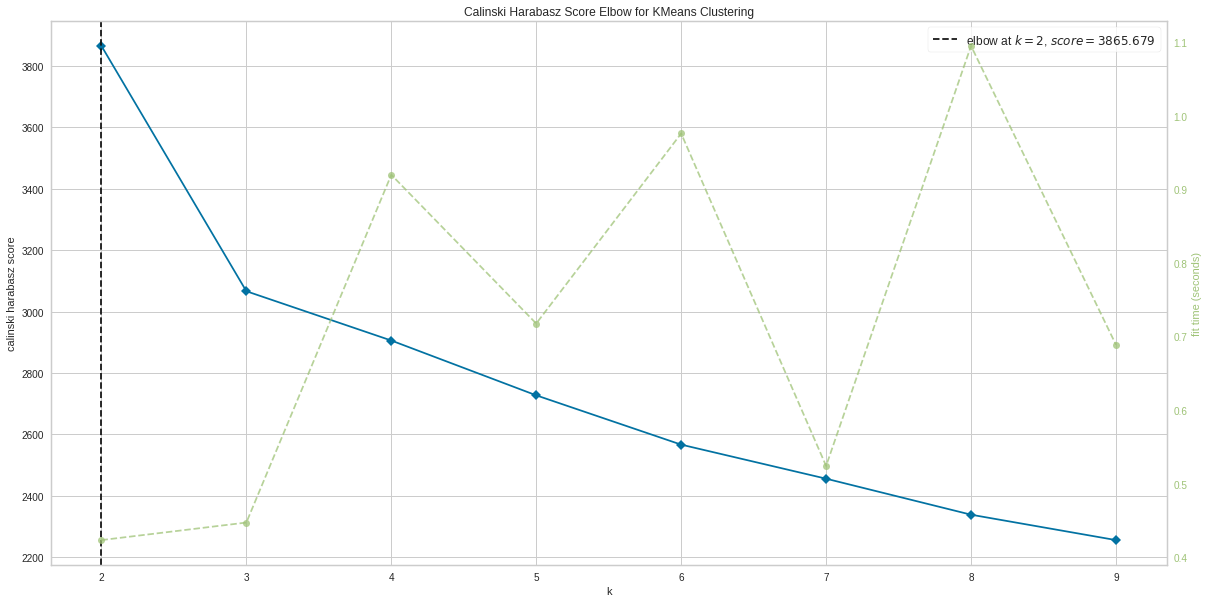

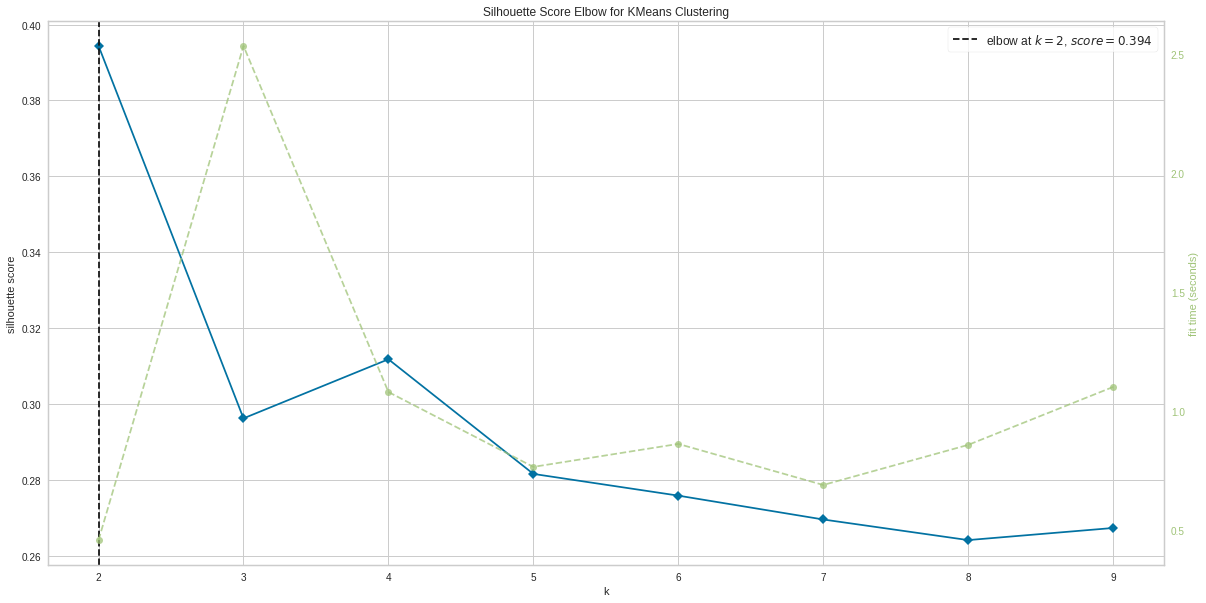

In [ ]:
#Plot. 

elbow_method(Log_rfm_Data)

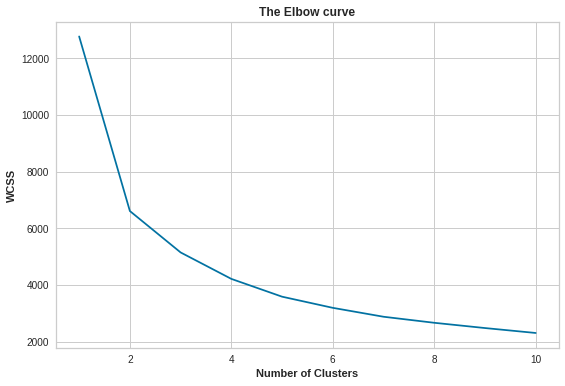

In [ ]:
# within cluster sum of squares:
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting curve

plt.figure(figsize = (9,6))
plt.grid(True)
plt.plot(range(1,11),wcss)
plt.title('The Elbow curve',fontweight = 'bold')
plt.xlabel('Number of Clusters',fontweight = 'bold')
plt.ylabel('WCSS', fontweight = 'bold')
plt.show()

Best cluster number is 4(acc to elbow method). After that there is slight decrease in wcss. 

### ML Model - 4

**IMPLEMENTING HIERARCHICAL CLUSTERING**

---



In [ ]:
model4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = model4.fit_predict(X)

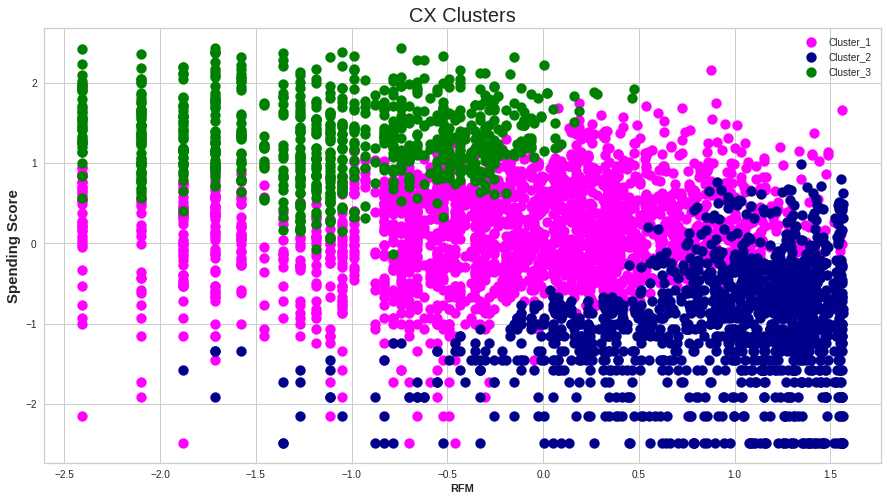

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'magenta', label = 'Cluster_1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'darkblue', label = 'Cluster_2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster_3')      

plt.title('CX Clusters', size = 20)
plt.xlabel('RFM', fontweight = 'bold')
plt.ylabel('Spending Score', size = 15, fontweight = 'bold')
plt.legend()
plt.show()

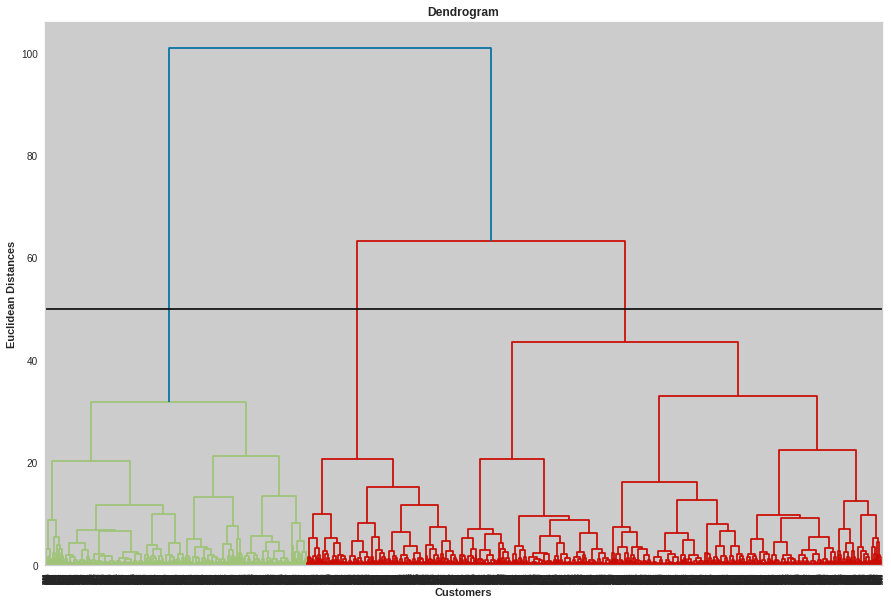

In [ ]:
#Dendogram plot: for best cluster number:

rcParams['figure.figsize'] = 15, 10

# max_d = cut-off/ Threshold value
max_d = 50

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
#Cutting it on threshold value, 50.
plt.axhline(y = max_d,c = 'k')
plt.show()

By choosing max_d = 50, we are getting three intersection or say three clusters. 
By choosing max_d vaue, we will get diffferent cluster numbers. 

In [ ]:
final_table = PrettyTable(['Sr. No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
final_table.add_row(['1','K-Means','RFM',"3"])
final_table.add_row(['2',"K-Means with silhouette_score ", "RFM", "2"]) 
final_table.add_row(['3',"K-Means with Elbow method  ", "RFM", "4"])
final_table.add_row(['4',"Hierarchical clustering  ", "RFM", "2"])
final_table.add_row(['5',"Hierarchical clustering after Cut-off ", "RFM", "3"])
print(final_table)

+---------+----------------------------------------+------+---------------------------+
| Sr. No. |               Model_Name               | Data | Optimal_Number_of_cluster |
+---------+----------------------------------------+------+---------------------------+
|    1    |                K-Means                 | RFM  |             3             |
|    2    |     K-Means with silhouette_score      | RFM  |             2             |
|    3    |      K-Means with Elbow method         | RFM  |             4             |
|    4    |       Hierarchical clustering          | RFM  |             2             |
|    5    | Hierarchical clustering after Cut-off  | RFM  |             3             |
+---------+----------------------------------------+------+---------------------------+


### 1. Which ML model did you choose from the above created models as your final prediction model and why?

I am using K mean cluster as our model, as it's dividing the customers in 3 clusters according to there website visiting nature. 2 cluster as suggested by hierarchical clustering is too low to divide the customer, thus 3 clusters will help us in making better buisness and advertisment stratergy.

**Cluster 0 or New customers(considered)**: The group of customers of whom Recency is very low, frequencies are very less and Company is generating only few bucks.

**Cluster 1 or casual customer**: This cluster give the insights that these are marked with less frequency but more frequent than cluster 0 and company is making more money than cluster 0.

**Cluster 2 or loyal customer**: These are one who visits more, they are more frequent and they are helping to generate a lot of business.

# **Conclusion**

Following are the conclusion made during EDA:

1. Top Five Countries: Uniter Kingdom, Germany, France, Ireland and Spain.

2. Month which give maximum business: November, October, December, September and May.

3. Maximum purchasing on different days: Thursday > Wednesday > Tuesday > Monday > Saturday > Friday.

4. Most of the customers usually purchase products in between 10:00 A.M to 3:00 P.M.
The company should make sure that the website server is up and running during that hrs, and also invest on cx support during that hrs. 

5. WHITE HANGING HEART T-LIGHT HOLDER > REGENCY CAKESTAND 3 TIER> JUMBO BAG RED RETROSPOT were ordered with top 3 highest frequency. 
The company is suggested to keep the inventory always stocked with these products.

6. GLASS AND BEADS BRACELET IVORY , CROCHET LILAC/RED BEAR KEYRING , PINK BAROQUE FLOCK CANDLE HOLDER were ordered in the lo9west number. 

7. A number of cx also cancelled the order. The company should ideally look into it. 

Following is the number of clusters suggested by different ML algorithm:

1. K-Means = Optimal Clusters(3)
2. K-Means with Silhoutte = Optimal_Clusters: (2)
3. K-Means with Elbow Method = Optimal_Clusters: (4)
4. Hierarchical Clustering = Optimal_Clusters: (2)
5. Hierarchical Clustering with cut-off = Optimal_Cluster: (3)

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***